# 278k Emotion Labeled Spotify Songs  
https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset  
- Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}  


**RESULT**  
Mean accuracy cv: 0.8350875987633115


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Load Dataset

In [ ]:
df = pd.read_csv('/content/278k_labelled_uri.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Epita/project/DataProject/dataset/278k_song_labelled.csv')

# Data Preprocessing

### Visualization

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15015 entries, 0 to 15014
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      15015 non-null  int64  
 1   Unnamed: 0        15015 non-null  int64  
 2   duration (ms)     15015 non-null  float64
 3   danceability      15015 non-null  float64
 4   energy            15015 non-null  float64
 5   loudness          15015 non-null  float64
 6   speechiness       15015 non-null  float64
 7   acousticness      15015 non-null  float64
 8   instrumentalness  15015 non-null  float64
 9   liveness          15015 non-null  float64
 10  valence           15015 non-null  float64
 11  tempo             15015 non-null  float64
 12  spec_rate         15015 non-null  float64
 13  labels            15015 non-null  int64  
 14  uri               15015 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,15015.000000,15015.000000,1.501500e+04,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,15015.000000,1.501500e+04,15015.000000
mean,7507.000000,7507.000000,2.202969e+05,0.526829,0.695230,-8.189516,0.085889,0.211957,0.180592,0.210007,0.459827,123.691461,4.901059e-07,1.267399
std,4334.601481,4334.601481,9.602655e+04,0.186387,0.239344,5.087463,0.089985,0.294657,0.317960,0.173897,0.250353,30.019329,8.193663e-07,0.878127
min,0.000000,0.000000,1.404000e+04,0.000000,0.000175,-48.321000,0.000000,0.000000,0.000000,0.013200,0.000000,0.000000,0.000000e+00,0.000000
25%,3753.500000,3753.500000,1.729365e+05,0.396000,0.539000,-9.797500,0.036300,0.002480,0.000002,0.098400,0.260500,99.978500,1.598684e-07,1.000000
50%,7507.000000,7507.000000,2.105010e+05,0.533000,0.747000,-6.880000,0.051600,0.049600,0.000766,0.137000,0.449000,122.422000,2.511468e-07,1.000000
75%,11260.500000,11260.500000,2.526400e+05,0.665000,0.897000,-4.980000,0.093550,0.333000,0.175000,0.285000,0.654000,143.795500,5.060941e-07,2.000000
max,15014.000000,15014.000000,3.600000e+06,0.987000,1.000000,2.624000,0.938000,0.996000,1.000000,0.997000,0.992000,217.591000,2.892774e-05,3.000000


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
uri                 0
dtype: int64

In [ ]:
# Select the relevant features 관련된 특징들만 추출 (그 외는 drop)
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
print('num of features =', len(features))


df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'spec_rate', 'uri'], axis = 1, inplace = True)

num of features = 9


### Outlier Detection

<Axes: >

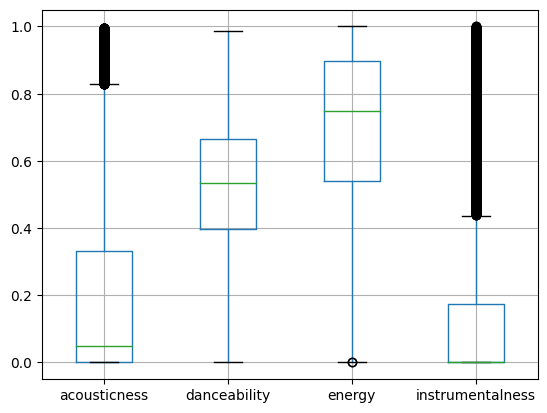

In [ ]:
df.boxplot(column= features[:4])

<Axes: >

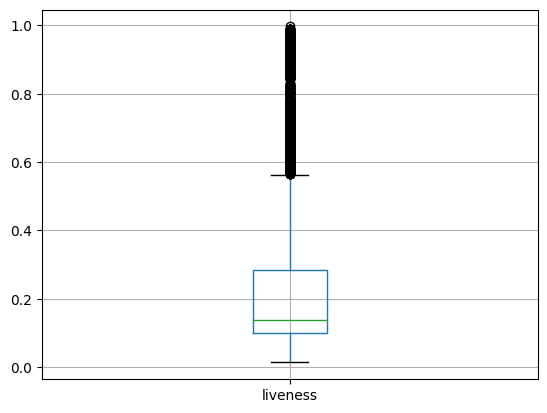

In [ ]:
df.boxplot(column= features[4])

<Axes: >

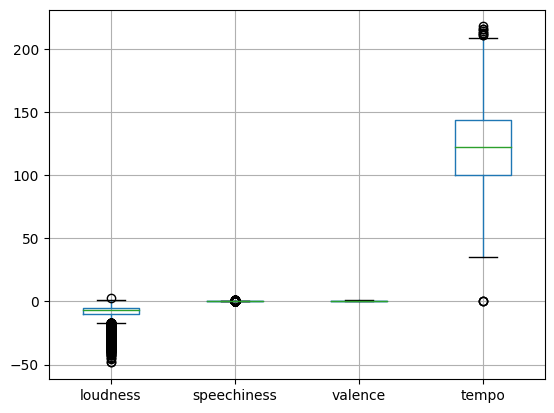

In [ ]:
df.boxplot(column= features[5:])

<Axes: >

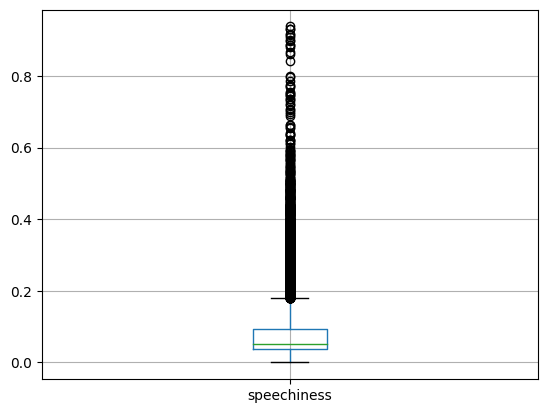

In [ ]:
df.boxplot(column= features[6])

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>, <Axes: >]], dtype=object)

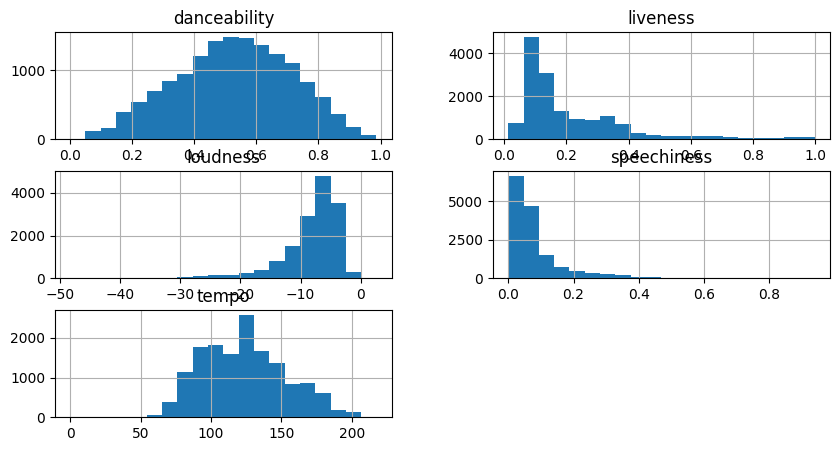

In [ ]:
temp = ['danceability','liveness', 'loudness', 'speechiness', 'tempo']

original_df = df[temp]
original_df.hist(bins=20, figsize=(10,5))

In [ ]:
# 1) Q1, Q3, IQR 정의하기
Q1 = df[temp].quantile(q=0.25)
Q3 = df[temp].quantile(q=0.75)
print("Q1 \n", Q1)
print("\nQ3 \n", Q3)

Q1 
 danceability     0.3960
liveness         0.0984
loudness        -9.7975
speechiness      0.0363
tempo           99.9785
Name: 0.25, dtype: float64

Q3 
 danceability      0.66500
liveness          0.28500
loudness         -4.98000
speechiness       0.09355
tempo           143.79550
Name: 0.75, dtype: float64


IQR = Q3 - Q1   
 1.5 기준

In [ ]:
# 2) 이상치 데이터 제거하기 (이상치가 아닌 데이터만 채택하기)
# temp = ['danceability','liveness', 'loudness', 'speechiness', 'tempo']

IQR = Q3 - Q1
original_df = df
IQR_df = df[(df[temp[0]] <= Q3[temp[0]]+1.5*IQR[temp[0]]) & (df[temp[0]] >= Q1[temp[0]]-1.5*IQR[temp[0]])]

for col in temp:
  if col != 'danceability':
    IQR_df = IQR_df[(IQR_df[col] <= Q3[col]+1.5*IQR[col]) & (IQR_df[col] >= Q1[col]-1.5*IQR[col])]


print('original_df :', len(original_df))
print('IQR_df :', len(IQR_df))
IQR_df.head()

original_df : 15015
IQR_df : 12039


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1
5,0.572,0.837,-7.876,0.0367,0.0197,0.000000,0.1630,0.627,100.343,1


이상치 제거 잘 되었는지 확인

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'labels'}>, <Axes: >, <Axes: >]],
      dtype=object)

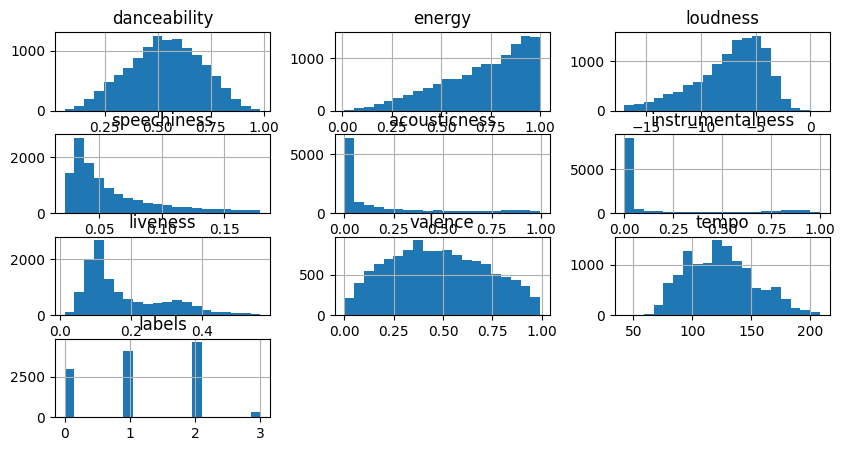

In [ ]:
IQR_df.hist(bins=20, figsize=(10,5))

<Axes: >

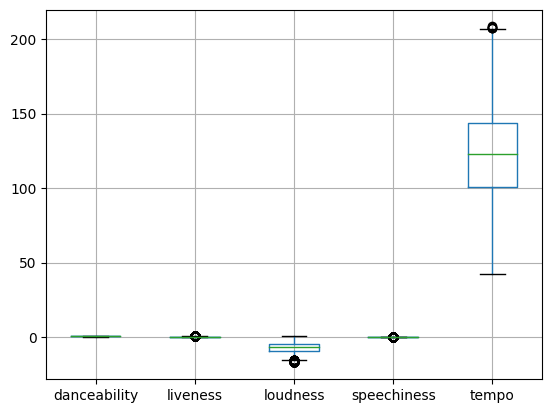

In [ ]:
IQR_df.boxplot(column= temp)

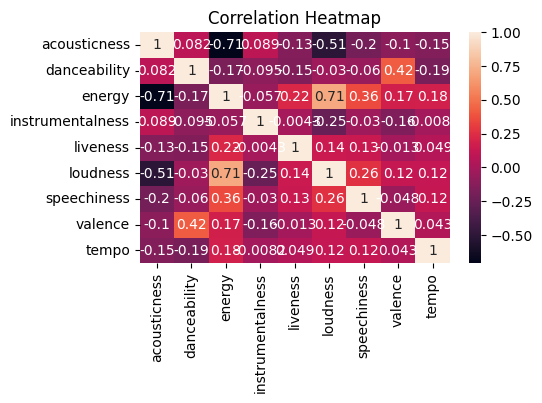

In [ ]:
# Calculate the correlation matrix

corr = IQR_df[features].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True) ##
plt.title('Correlation Heatmap')
plt.show()

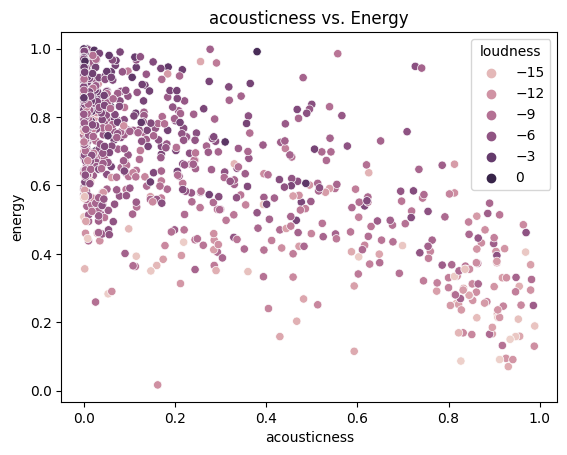

In [ ]:
scatter_data = IQR_df.sample(1000)  # Sample subset of data for scatter plots

# Scatter plot of Danceability vs. Energy
sns.scatterplot(data=scatter_data, x='acousticness', y='energy', hue='loudness')
plt.title('acousticness vs. Energy')
plt.show()

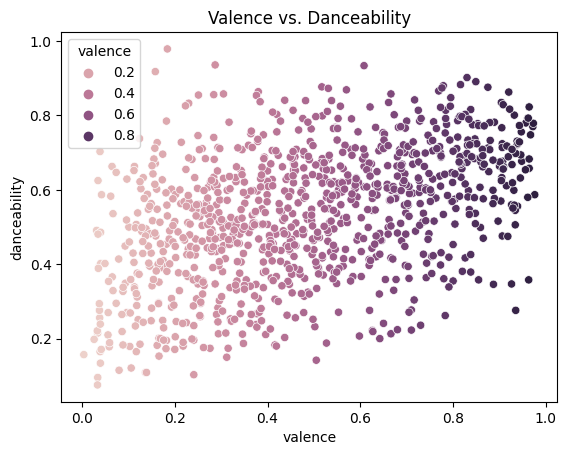

In [ ]:
sns.scatterplot(data=scatter_data, x='valence', y='danceability', hue='valence')
plt.title('Valence vs. Danceability')
plt.show()

In [ ]:
IQR_df.to_csv('new_278k_labelled_uri.csv')

# Split into Train/Test set

In [ ]:
# Update IQR_df as df
df = IQR_df

In [ ]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1
5,0.572,0.837,-7.876,0.0367,0.0197,0.000000,0.1630,0.627,100.343,1


In [ ]:
X = df.iloc[:, :-1] ## duration ~ spec_rate
y = df.iloc[:, -1] ## labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train.shape, y_train.shape

((9631, 9), (9631,))

# Define  & fit model

k-fold + normalization  
: https://datascience.stackexchange.com/questions/87085/k-fold-cross-validation-and-data-leakage

In [ ]:
# KNN
model = Pipeline([("scaling", StandardScaler()), ("modeling", KNeighborsClassifier(n_neighbors=5))]).fit(X_train, y_train)  # ("imputing", SimpleImputer(strategy= "mean")),

cv_scores = cross_val_score(estimator= model, X = X_train, y = y_train, scoring= "accuracy")

# Prediction

In [ ]:
print(f"Mean accuracy cv: {np.mean(cv_scores)}")

model.score(X_test, y_test)

Mean accuracy cv: 0.7939984404815215


0.8143687707641196

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       595
           1       0.76      0.80      0.78       797
           2       0.88      0.87      0.88       947
           3       0.71      0.65      0.68        69

    accuracy                           0.81      2408
   macro avg       0.79      0.77      0.78      2408
weighted avg       0.82      0.81      0.81      2408

